In [2]:
library(tidyverse)
library(here)
library(ggrepel)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /Users/jannusgoecke/Desktop/elisa



In [ ]:
# Konstanten aus dem Skript
MASSENKONZ_STAMM_G_PER_L <- 8 # 8 mg/ml = 8 g/L
MOLMASSE_AK_G_PER_MOL  <- 150000 # 150 kDa = 150'000 g/mol

In [4]:
# daten einlesen
daten_5min <- read_csv(here("data", "elisa_5min.csv")) %>% mutate(Zeitpunkt = 5)
daten_10min <- read_csv(here("data", "elisa_12min.csv")) %>% mutate(Zeitpunkt = 12)
daten_15min <- read_csv(here("data", "elisa_17min.csv")) %>% mutate(Zeitpunkt = 17)

New names:
• `` -> `...1`
Rows: 8 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ...1
dbl (12): 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 8 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ...1
dbl (12): 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 8 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ...1
dbl (12): 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ 

In [7]:
rohdaten <- bind_rows(daten_5min, daten_10min, daten_15min)

rohdaten

...1,1,2,3,4,5,6,7,8,9,10,11,12,Zeitpunkt
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,0.090,0.090,0.086,0.051,0.049,0.049,0.099,0.094,0.092,0.043,0.043,0.041,5
B,0.091,0.082,0.084,0.045,0.048,0.052,0.090,0.084,0.088,0.040,0.039,0.044,5
C,0.072,0.069,0.076,0.032,0.041,0.029,0.083,0.069,0.071,0.036,0.036,0.031,5
D,0.064,0.065,0.064,0.038,0.044,0.057,0.069,0.062,0.063,0.044,0.040,0.046,5
E,0.061,0.062,0.059,0.044,0.055,0.045,0.065,0.062,0.059,0.043,0.046,0.047,5
F,0.051,0.054,0.052,0.042,0.042,0.042,0.056,0.066,0.048,0.042,0.041,0.041,5
G,0.050,0.047,0.052,0.041,0.043,0.040,0.053,0.051,0.049,0.044,0.046,0.051,5
H,0.044,0.045,0.045,0.044,0.049,0.046,0.056,0.053,0.049,0.051,0.045,0.050,5
A,0.162,0.164,0.162,0.056,0.052,0.049,0.163,0.160,0.160,0.045,0.046,0.041,12


In [10]:
daten_long <- rohdaten %>%
  rename(well_row = 1) %>% 
  pivot_longer(
    cols = -c(well_row, Zeitpunkt),
    names_to = "Well_Spalte",
    values_to = "Absorption"
  ) %>%
  mutate(Well_Spalte = as.numeric(Well_Spalte))

daten_long

well_row,Zeitpunkt,Well_Spalte,Absorption
<chr>,<dbl>,<dbl>,<dbl>
A,5,1,0.090
A,5,2,0.090
A,5,3,0.086
A,5,4,0.051
A,5,5,0.049
A,5,6,0.049
A,5,7,0.099
A,5,8,0.094
A,5,9,0.092


In [14]:
# einbindung der meta daten
elisa_daten <- daten_long %>%
  mutate(
    # antigen
    Antigen = case_when(
      Well_Spalte %in% c(1:3, 7:9) ~ "BSA",
      Well_Spalte %in% c(4:5, 10:11) ~ "HSA",
      Well_Spalte %in% c(6, 12) & well_row %in% LETTERS[1:4] ~ "BSA",
      Well_Spalte %in% c(6, 12) & well_row %in% LETTERS[5:8] ~ "HSA"
    ),
    # kontrolle oder messung
    Typ = case_when(
      Well_Spalte %in% c(6, 12) ~ "Kontrolle",
      TRUE ~ "Messung"
    ),
    # eindeutigen name
    Replikat = case_when(
      Typ == "Messung" ~ paste0(Antigen, "_", Well_Spalte),
      Typ == "Kontrolle" ~ paste0(Antigen, "_Kontrolle")
    )
  )

elisa_daten

well_row,Zeitpunkt,Well_Spalte,Absorption,Antigen,Typ,Replikat
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
A,5,1,0.090,BSA,Messung,BSA_1
A,5,2,0.090,BSA,Messung,BSA_2
A,5,3,0.086,BSA,Messung,BSA_3
A,5,4,0.051,HSA,Messung,HSA_4
A,5,5,0.049,HSA,Messung,HSA_5
A,5,6,0.049,BSA,Kontrolle,BSA_Kontrolle
A,5,7,0.099,BSA,Messung,BSA_7
A,5,8,0.094,BSA,Messung,BSA_8
A,5,9,0.092,BSA,Messung,BSA_9


In [15]:
C_STAMM_MOLAR <- MASSENKONZ_STAMM_G_PER_L / MOLMASSE_AK_G_PER_MOL

verduennungsfaktoren <- c(
  "A" = 500, "B" = 1000, "C" = 2000, "D" = 4000,
  "E" = 8000, "F" = 16000, "G" = 32000, "H" = 64000
)

In [27]:
elisa_daten <- elisa_daten %>%
  mutate(
    Konzentration_AK_M = if_else(
      Typ == "Messung",
      C_STAMM_MOLAR / verduennungsfaktoren[well_row],
      0
    ),
    Zeitpunkt = factor(Zeitpunkt)
  )

elisa_daten

well_row,Zeitpunkt,Well_Spalte,Absorption,Antigen,Typ,Replikat,Konzentration_AK_M
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
A,5,1,0.090,BSA,Messung,BSA_1,1.066667e-07
A,5,2,0.090,BSA,Messung,BSA_2,1.066667e-07
A,5,3,0.086,BSA,Messung,BSA_3,1.066667e-07
A,5,4,0.051,HSA,Messung,HSA_4,1.066667e-07
A,5,5,0.049,HSA,Messung,HSA_5,1.066667e-07
A,5,6,0.049,BSA,Kontrolle,BSA_Kontrolle,0.000000e+00
A,5,7,0.099,BSA,Messung,BSA_7,1.066667e-07
A,5,8,0.094,BSA,Messung,BSA_8,1.066667e-07
A,5,9,0.092,BSA,Messung,BSA_9,1.066667e-07


# Aufgabe 1
Visualisiering der Rohdaten

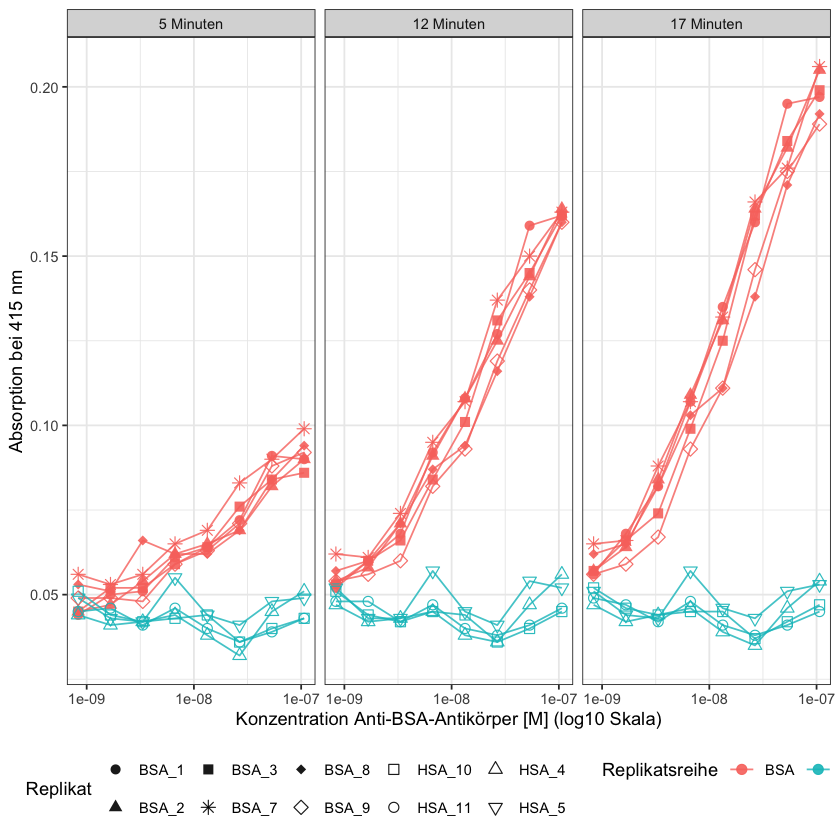

In [60]:
plot_rohdaten <- elisa_daten %>%
  filter(Typ == "Messung") %>%
  ggplot(aes(x = Konzentration_AK_M, y = Absorption, color = Antigen, group = Replikat)) +
  geom_line(alpha = 0.8) +
  geom_point(aes(shape = Replikat), size = 2.5, alpha = 0.9) +
  scale_x_log10(labels = scales::scientific_format(digits = 2)) +
  facet_wrap(~ Zeitpunkt, labeller = labeller(Zeitpunkt = ~ paste0(.x, " Minuten"))) +
  scale_shape_manual(values = c(16, 17, 15, 8, 18, 5, 0, 1, 2, 6)) +
  labs(
    x = "Konzentration Anti-BSA-Antikörper [M] (log10 Skala)",
    y = "Absorption bei 415 nm",
    color = "Replikatsreihe"
  ) +
  theme_bw() +
  theme(legend.position = "bottom")


print(plot_rohdaten)

In [61]:
ggsave("figures/plot_rohdaten.png", plot_rohdaten, width = 12, height = 7, dpi = 300)

In [57]:
elisa_summary <- elisa_daten %>%
  filter(Typ == "Messung") %>%
  group_by(Antigen, Zeitpunkt, Konzentration_AK_M) %>%
  summarise(
    Mean_Absorption = mean(Absorption),
    SD_Absorption = sd(Absorption),
    .groups = "drop" 
  )
elisa_summary

Antigen,Zeitpunkt,Konzentration_AK_M,Mean_Absorption,SD_Absorption
<chr>,<fct>,<dbl>,<dbl>,<dbl>
BSA,5,8.333333e-10,0.04866667,0.0049261209
BSA,5,1.666667e-09,0.05033333,0.0021602469
BSA,5,3.333333e-09,0.05450000,0.0062529993
BSA,5,6.666667e-09,0.06133333,0.0022509257
BSA,5,1.333333e-08,0.06450000,0.0024289916
BSA,5,2.666667e-08,0.07333333,0.0053913511
BSA,5,5.333333e-08,0.08650000,0.0036742346
BSA,5,1.066667e-07,0.09183333,0.0044007575
BSA,12,8.333333e-10,0.05533333,0.0036696957


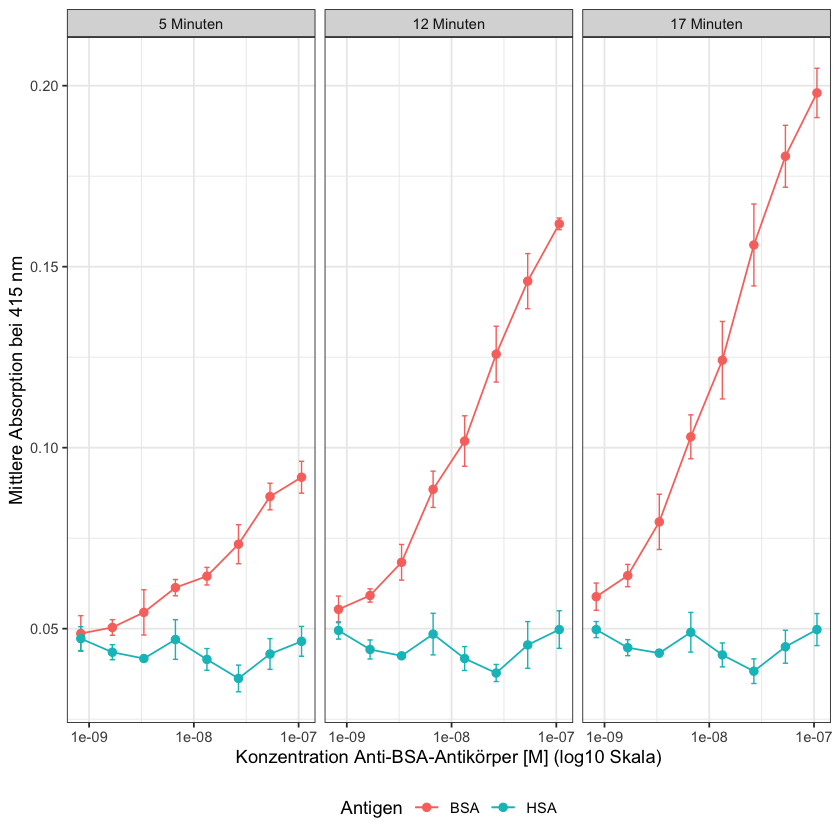

In [64]:
plot_mittelwert <- ggplot(elisa_summary, aes(x = Konzentration_AK_M, y = Mean_Absorption, color = Antigen)) +
  geom_errorbar(aes(ymin = Mean_Absorption - SD_Absorption,
                    ymax = Mean_Absorption + SD_Absorption),
                width = 0.05,
                linewidth = 0.4) +
  geom_line(linewidth = 0.5) +
  geom_point(size = 2) +
  scale_x_log10(labels = scales::scientific_format(digits = 2)) +
  facet_wrap(~ Zeitpunkt, labeller = labeller(Zeitpunkt = ~ paste0(.x, " Minuten"))) +

  labs(
    x = "Konzentration Anti-BSA-Antikörper [M] (log10 Skala)",
    y = "Mittlere Absorption bei 415 nm",
    color = "Antigen",
    fill = "Antigen"
  ) +
  theme_bw() +
  theme(legend.position = "bottom")

print(plot_mittelwert)

In [65]:
ggsave("figures/plot_mean_rohdaten.png", plot_mittelwert, width = 12, height = 7, dpi = 300)

# Aufgabe 2

In [45]:
# korrekturwerte: mittlere unspezifische Bindung aus Kontroll-Wells

korrekturwerte <- elisa_daten %>%
  filter(Typ == "Kontrolle") %>%
  group_by(Zeitpunkt, Antigen) %>%
  summarise(
    Abs_Korrektur = mean(Absorption),
    .groups = "drop" 
  )

korrekturwerte

Zeitpunkt,Antigen,Abs_Korrektur
<fct>,<chr>,<dbl>
5,BSA,0.043625
5,HSA,0.045250
12,BSA,0.043375
12,HSA,0.045750
17,BSA,0.043500
17,HSA,0.047000


In [46]:
elisa_korrigiert <- elisa_daten %>%
  left_join(korrekturwerte, by = c("Zeitpunkt", "Antigen")) %>%
  mutate(
    Absorption_korrigiert = Absorption - Abs_Korrektur
  )

Für den Sättigungskurvenfit wird eine Verdünnungsreihe herausgesucht, die ein starkes Signal hat (aus Messung bei 17 min) und die Daten gut vertritt (BSA_3)

In [48]:
daten_fuer_fit <- elisa_korrigiert %>%
  filter(Replikat == "BSA_3" & Zeitpunkt == 17)

In [ ]:
startwerte <- list(
  A_max = max(daten_fuer_fit$Absorption_korrigiert, na.rm = TRUE),
  K_D = median(daten_fuer_fit$Konzentration_AK_M, na.rm = TRUE)
)

# nls = "non-linear least squares"
fit_nls <- nls(
  Absorption_korrigiert ~ (A_max * Konzentration_AK_M) / (K_D + Konzentration_AK_M),
  data = daten_fuer_fit,
  start = startwerte
)


fit_summary <- summary(fit_nls)
print(fit_summary)

A_max_fit <- coef(fit_nls)["A_max"]
K_D_fit <- coef(fit_nls)["K_D"]

cat("\n-----------------------------------------------------\n")
cat("Ergebnis der nichtlinearen Regression:\n")
cat(paste("  A_max =", format(A_max_fit, digits = 4), "\n"))
cat(paste("  Apparente KD =", format(K_D_fit, scientific = TRUE, digits = 3), "M\n"))
cat("-----------------------------------------------------\n")


Formula: Absorption_korrigiert ~ (A_max * Konzentration_AK_M)/(K_D + Konzentration_AK_M)

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
A_max 1.782e-01  4.124e-03   43.20 1.03e-08 ***
K_D   1.461e-08  1.031e-09   14.16 7.73e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003312 on 6 degrees of freedom

Number of iterations to convergence: 3 
Achieved convergence tolerance: 4.67e-06


-----------------------------------------------------
Ergebnis der nichtlinearen Regression:
  A_max = 0.1782 
  Apparente KD = 1.46e-08 M
-----------------------------------------------------


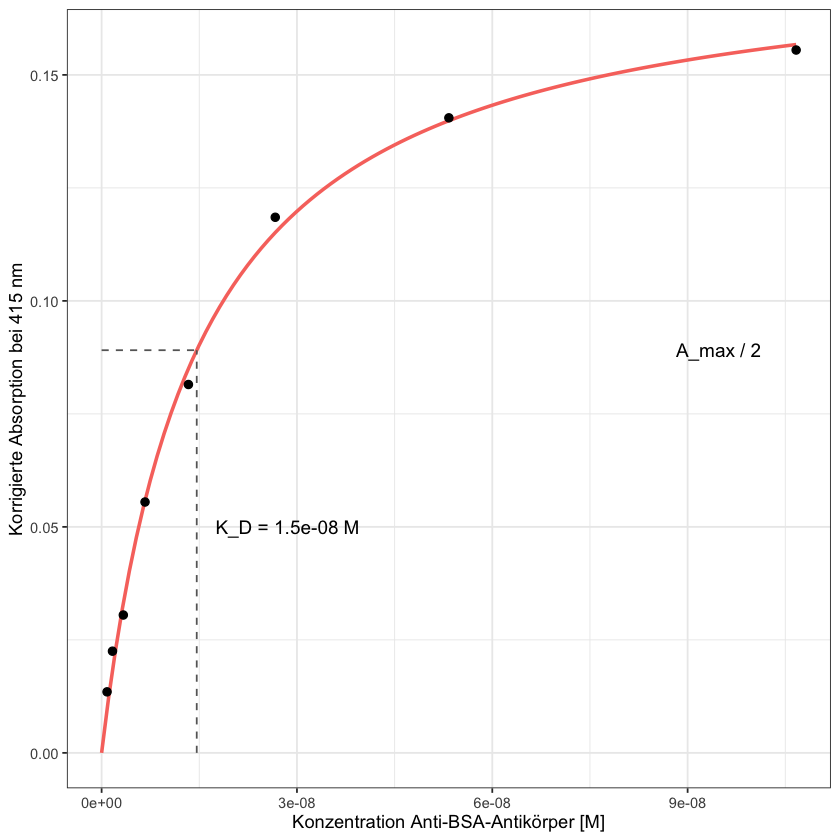

In [67]:
plot_saettigung <- ggplot(daten_fuer_fit, aes(x = Konzentration_AK_M, y = Absorption_korrigiert)) +
  
  # Die gefittete Kurve zeichnen
  stat_function(
    fun = function(x) (A_max_fit * x) / (K_D_fit + x),
    color = "#F8766D",
    linewidth = 1
  ) +
  
  geom_point(size = 2) +
  
  annotate("segment", x = 0, y = A_max_fit / 2, xend = K_D_fit, yend = A_max_fit / 2,
               linetype = "dashed", color = "grey40") +
  annotate("segment", x = K_D_fit, y = 0, xend = K_D_fit, yend = A_max_fit / 2,
               linetype = "dashed", color = "grey40") +
  
  annotate("text",
    x = K_D_fit * 1.2, y = 0.05,
    label = paste0("K_D = ", format(K_D_fit, scientific = TRUE, digits = 2), " M"),
    hjust = 0, size = 4
  ) +
  annotate("text",
    x = max(daten_fuer_fit$Konzentration_AK_M) * 0.95, y = A_max_fit / 2,
    label = "A_max / 2",
    hjust = 1, size = 4
  ) +

  labs(
    x = "Konzentration Anti-BSA-Antikörper [M]",
    y = "Korrigierte Absorption bei 415 nm"
  ) +
  scale_x_continuous(labels = scales::scientific_format(digits = 1)) +
  coord_cartesian(ylim = c(0, NA)) + 
  theme_bw()

print(plot_saettigung)

In [68]:
ggsave("figures/plot_saettigung_kd.png", plot_saettigung, width = 8, height = 6, dpi = 300)